# Sparse Logistic SVD: User Guide

## Setup

In [1]:
import slsvd
import numpy as np

print(slsvd.__version__)

0.1.0


In [2]:
import matplotlib.pyplot as plt

## Data Generation

In [3]:
from slsvd.data_generation import generate_data

In [4]:
bin_mat, loadings, scores, diagonal=generate_data(n=100, d=50, rank=2, random_seed=123)

In [5]:
bin_mat.shape

(100, 50)

In [6]:
loadings.shape

(50, 2)

In [7]:
scores.shape

(100, 2)

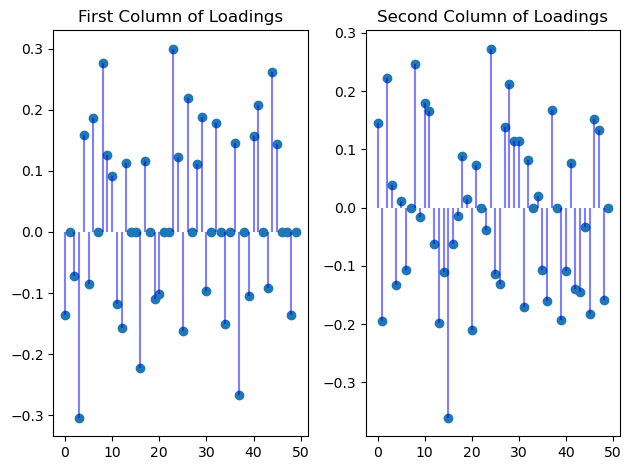

In [8]:
# Plotting the first column
plt.subplot(1, 2, 1)
plt.scatter(range(len(loadings[:, 0])), loadings[:, 0], marker='o')
for i, val in enumerate(loadings[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('First Column of Loadings')

# Plotting the second column
plt.subplot(1, 2, 2)
plt.scatter(range(len(loadings[:, 1])), loadings[:, 1], marker='o')
for i, val in enumerate(loadings[:, 1]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('Second Column of Loadings')

plt.tight_layout()
plt.show()

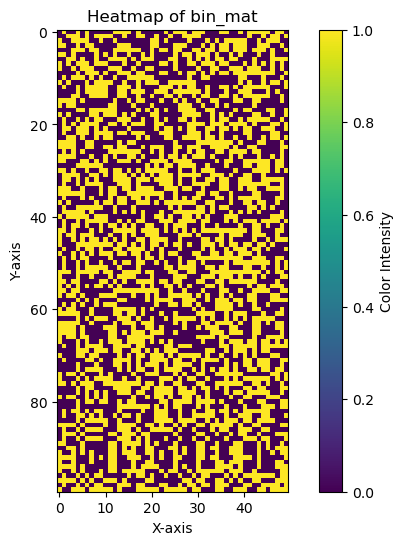

In [9]:
#import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(bin_mat, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Color Intensity')
plt.title('Heatmap of bin_mat')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

## Sparse Logistic SVD

In [10]:
from slsvd.slsvd import sparse_logistic_pca

In [11]:
from slsvd.sparse_logistic_pca import sparse_logistic_pca

In [12]:
mu, A, B, zeros, BIC, m, loss, lambdas = sparse_logistic_pca(bin_mat, lambda_val=0.01, k=2, procrustes=False, lasso=False)

In [13]:
#mu, A, B, zeros, BIC, m, lambda_val= sparse_logistic_pca(bin_mat, lambda_val=0.01, k=2, procrustes=False, lasso=False)

In [26]:
bin_mat.shape

(100, 50)

In [21]:
np.mean(mu)

-0.006960478928607536

In [22]:
A.shape

(100, 2)

In [23]:
B.shape

(50, 2)

In [25]:
zeros

15

In [28]:
np.count_nonzero(B != 0)

100

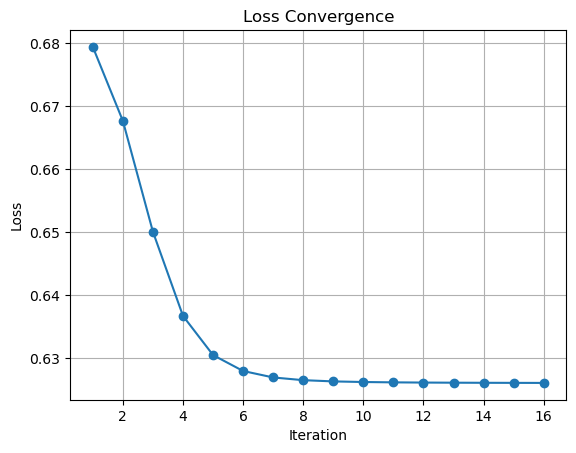

In [14]:
iterations = np.arange(1, len(loss) + 1)

# Plot loss values against iteration numbers
plt.plot(iterations, loss, marker='o', linestyle='-')
plt.title('Loss Convergence')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

## Visualization

In [15]:
from sklearn.decomposition import PCA

### PCA Visualization

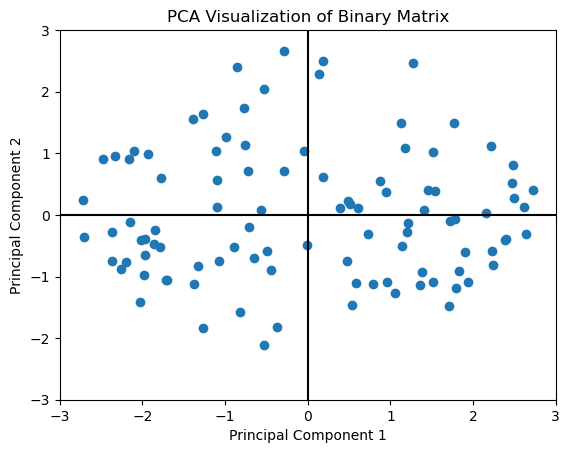

In [33]:
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(bin_mat)

# Visualize PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA Visualization of Binary Matrix')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.show()

### SVD Visualization

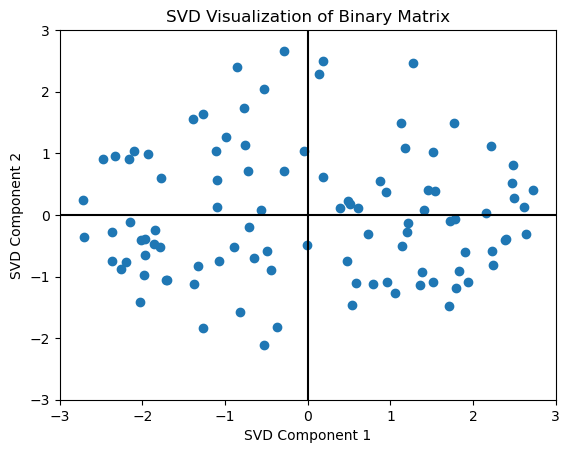

In [32]:
bin_mat_c = bin_mat - np.mean(bin_mat, axis=0)

# Step 2: Perform SVD on the centered matrix
U, S, Vt = np.linalg.svd(bin_mat_c, full_matrices=False)


# Take the first two components
svd_result = U[:, :2] * S[:2]

# Visualize SVD results
plt.scatter(svd_result[:, 0], svd_result[:, 1])
plt.title('SVD Visualization of Binary Matrix')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.show()

### Sparse Logistic PCA Visualization

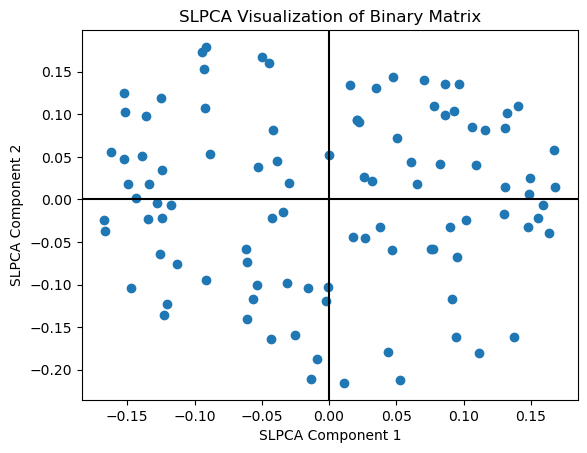

In [34]:
slpca_result=A
plt.scatter(slpca_result[:, 0], slpca_result[:, 1])
plt.title('SLPCA Visualization of Binary Matrix')
plt.xlabel('SLPCA Component 1')
plt.ylabel('SLPCA Component 2')
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.show()

### Visualization of Loadings

In [36]:
loadings.shape

(50, 2)

In [37]:
B.shape

(50, 2)

In [43]:
np.dot(loadings.T, loadings)

array([[1.00000000e+00, 1.09000638e-18],
       [1.09000638e-18, 1.00000000e+00]])

In [44]:
np.dot(B.T, B)

array([[2322.23768464,  107.19161403],
       [ 107.19161403,  788.69864601]])

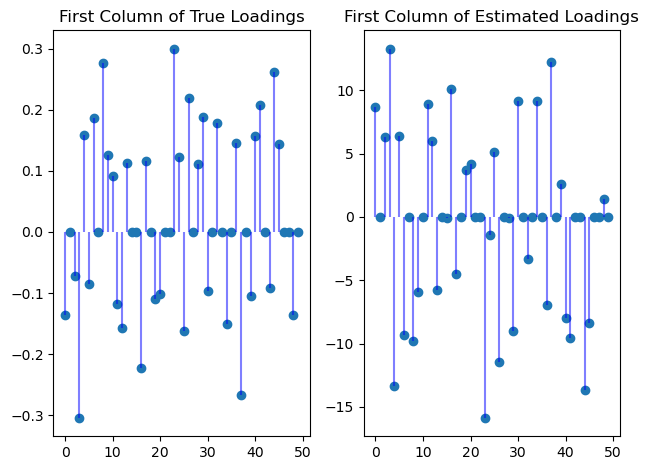

In [39]:
plt.subplot(1, 2, 1)
plt.scatter(range(len(loadings[:, 0])), loadings[:, 0], marker='o')
for i, val in enumerate(loadings[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('First Column of True Loadings')

# Plotting the second column
plt.subplot(1, 2, 2)
plt.scatter(range(len(loadings[:, 1])), B[:, 0], marker='o')
for i, val in enumerate(B[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('First Column of Estimated Loadings')

plt.tight_layout()
plt.show()

# Reference

Lee, S., Huang, J. Z., & Hu, J. (2010). Sparse logistic principal components analysis for binary data. The Annals of Applied Statistics, 4(3), 1579.